In [1]:
import requests
import io
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

In [2]:
def get_df_activity(activity):
    r = requests.get(f"http://docker.caracal-lime.ts.net:9000/exp?query=SELECT * FROM prod WHERE activity %3D '{activity}'")

    pData = pd.read_csv(io.StringIO(r.text), parse_dates=['timestamp'])
    return pData.set_index('timestamp', drop=True)

In [3]:
def plot_trunc_res_gyro(df:pd.DataFrame, len_s = 60, resample_freq_Hz = 50, size_raw_plot=(30,10), size_fft_plot=(10,10)):
    #plot raw signal
    activity = df["activity"][0]
    person = df["person"][0]

    df_gyro = df[["Gyroscope_x", "Gyroscope_y", "Gyroscope_z"]].resample(f"{int(1E6/resample_freq_Hz)}us", origin="start").interpolate(method='linear')
    df_gyro = df_gyro.loc[df_gyro.index <= df_gyro.index[0]+pd.Timedelta(len_s, "s")]
    
    print("Number of nans")
    print(df_gyro.isna().sum())

    plt.figure(figsize=size_raw_plot)
    for col in df_gyro.columns:
        plt.plot(df_gyro.index, df_gyro[col], label=col)

    plt.title(f"raw signal: {person} {activity} [{resample_freq_Hz}Hz resampled]")
    plt.xlabel("time")
    plt.ylabel("gyration")
    plt.legend()
    plt.show(block=True)

    #plot spectrum
    plt.figure(figsize=size_fft_plot)
    for col in df_gyro.columns:
        N = len(df_gyro[col])

        yf = fft(df_gyro[col].values)
        xf = fftfreq(N, 1 / resample_freq_Hz)

        plt.plot(xf[:N//2], 2.0/N * np.abs(yf[0:N//2]), label=col)
    
    plt.title(f"frequency spectrum: {person} {activity} [{resample_freq_Hz}Hz resampled]")
    plt.xlabel("frequency [Hz]")
    plt.ylabel("amplitude")
    plt.legend()
    plt.show(block=True)

C:\Users\tobia\AppData\Local\Temp\ipykernel_42668\4069607689.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for filename, df in get_df_activity("Laufen").groupby(["filename"]):


Number of nans
Gyroscope_x    0
Gyroscope_y    0
Gyroscope_z    0
dtype: int64


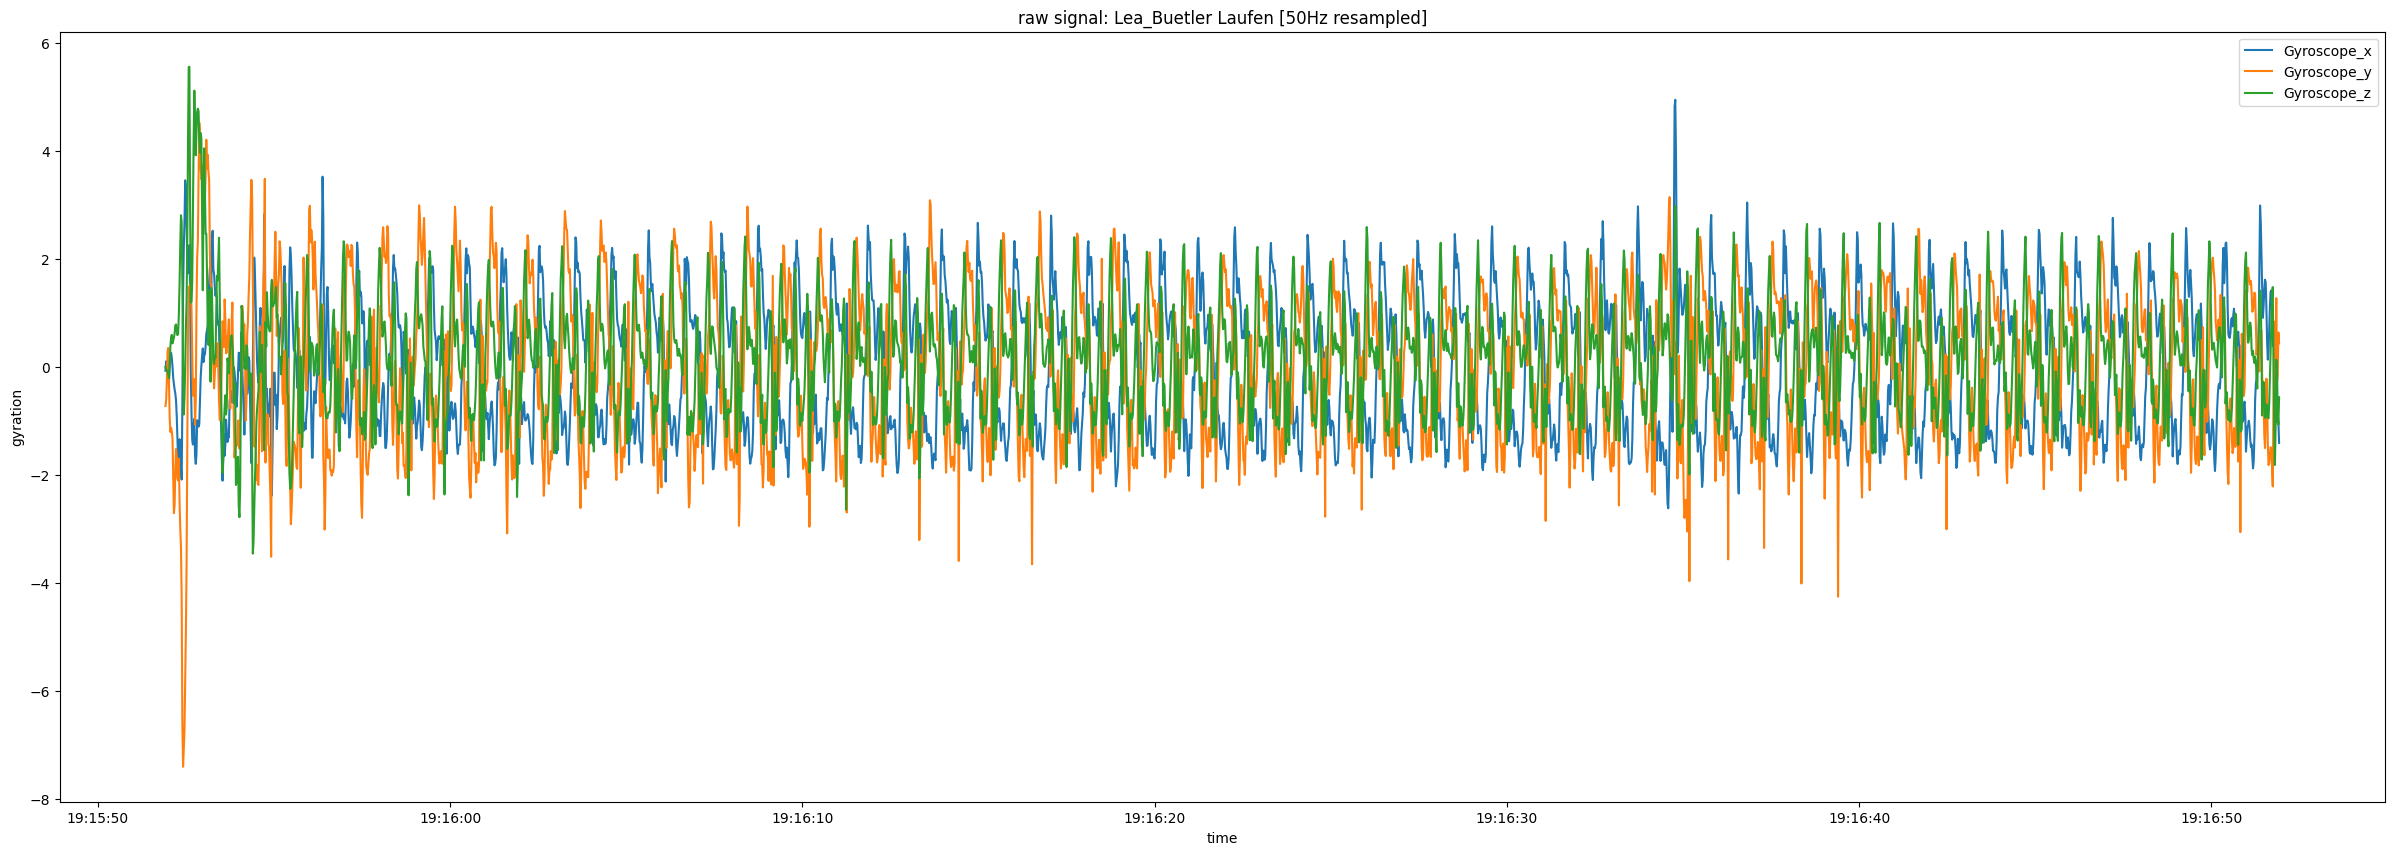

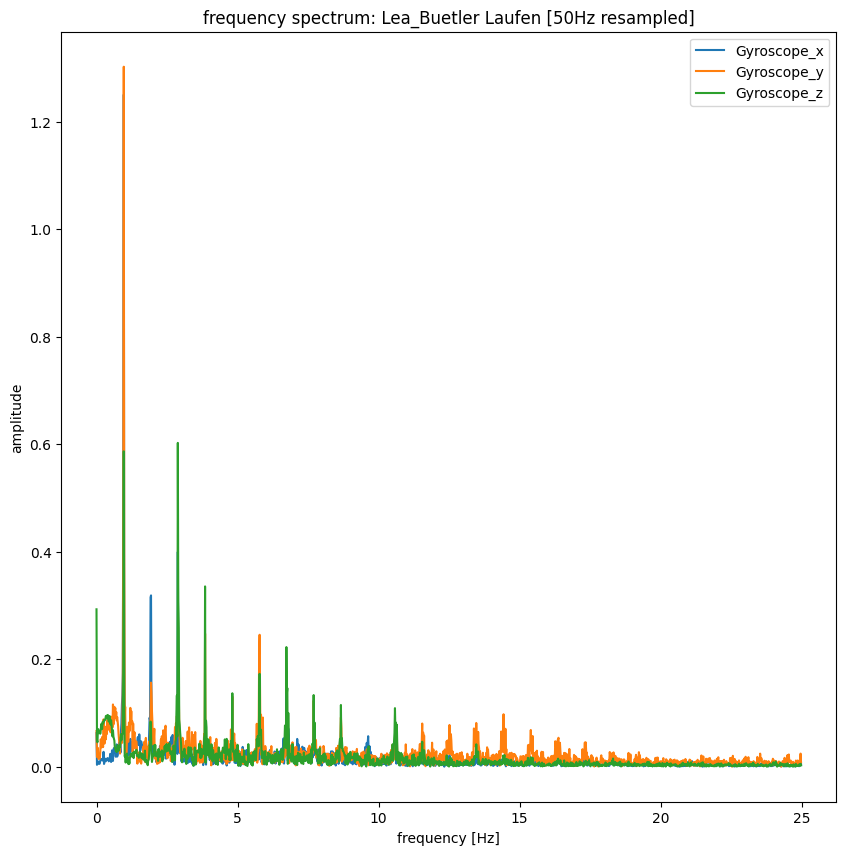

In [4]:
for filename, df in get_df_activity("Laufen").groupby(["filename"]):
    plot_trunc_res_gyro(df)

    break

C:\Users\tobia\AppData\Local\Temp\ipykernel_42668\3643025869.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for filename, df in get_df_activity("Rennen").groupby(["filename"]):


Number of nans
Gyroscope_x    0
Gyroscope_y    0
Gyroscope_z    0
dtype: int64


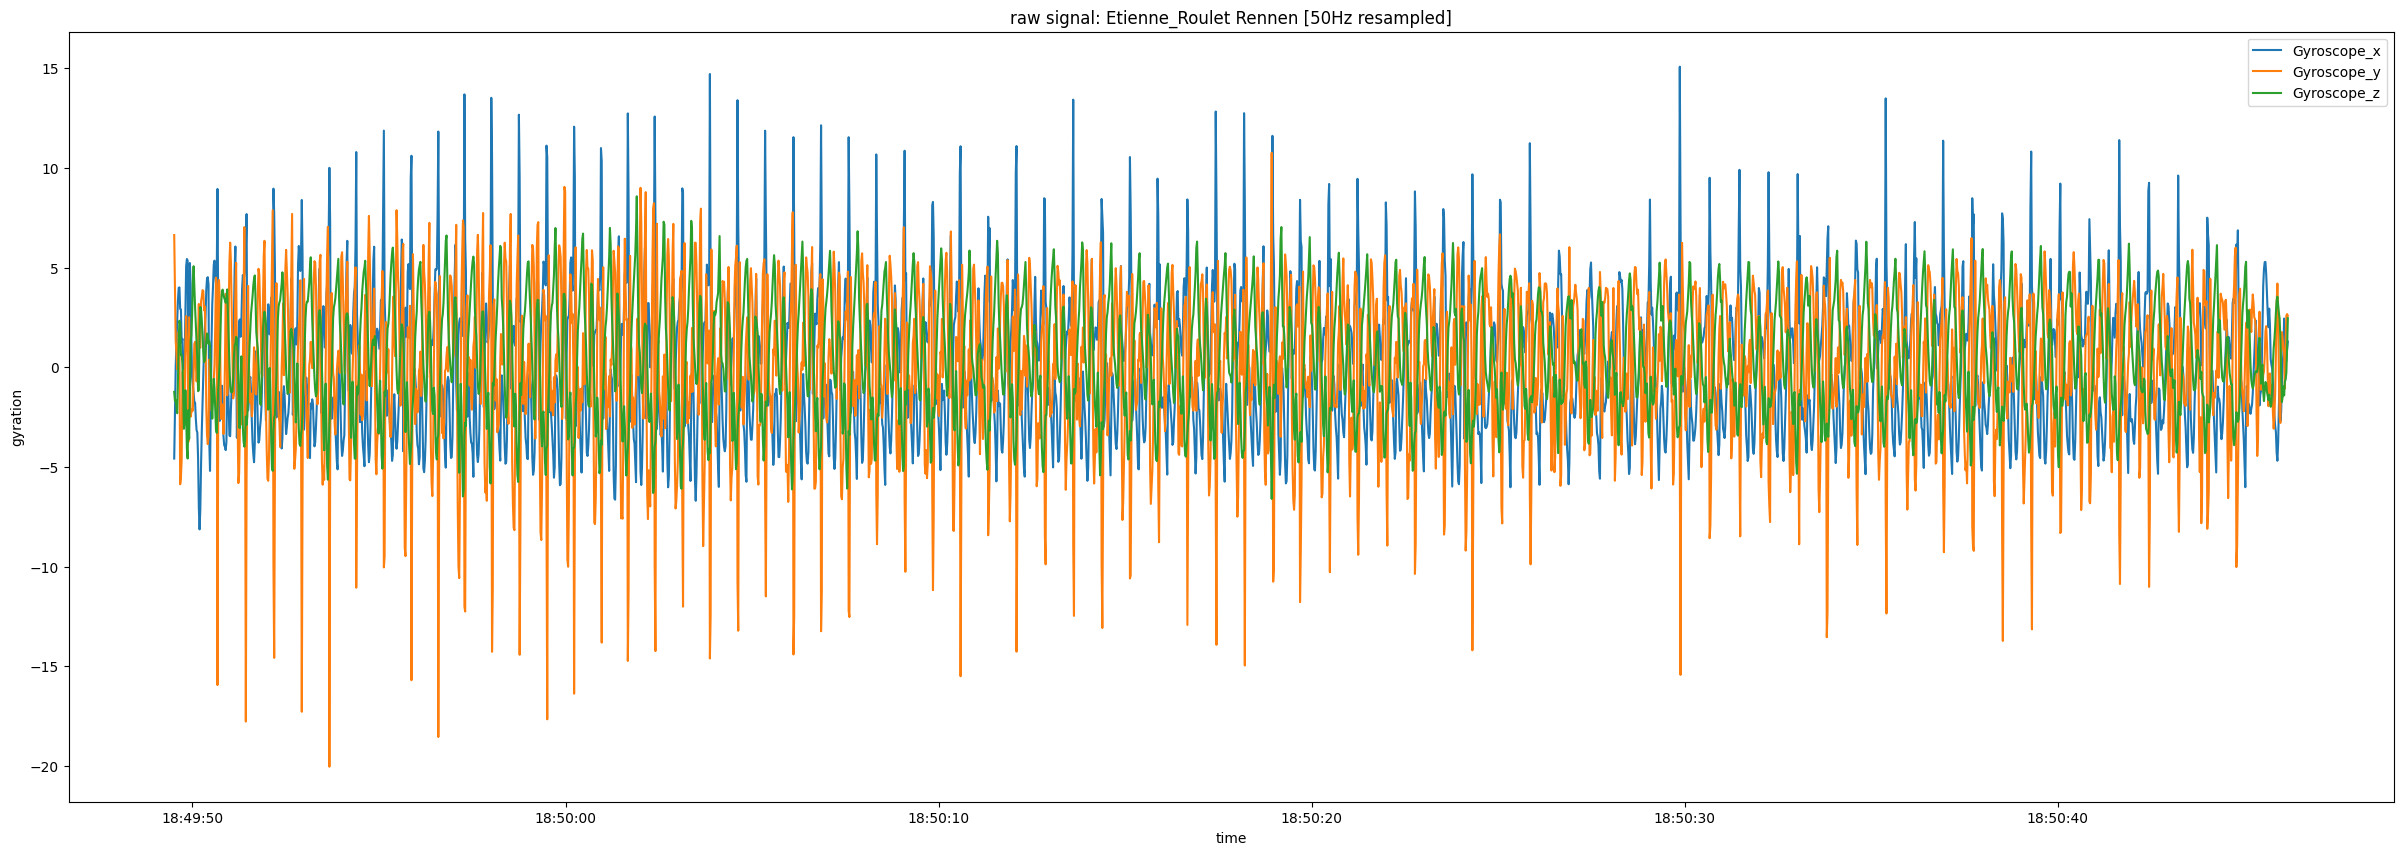

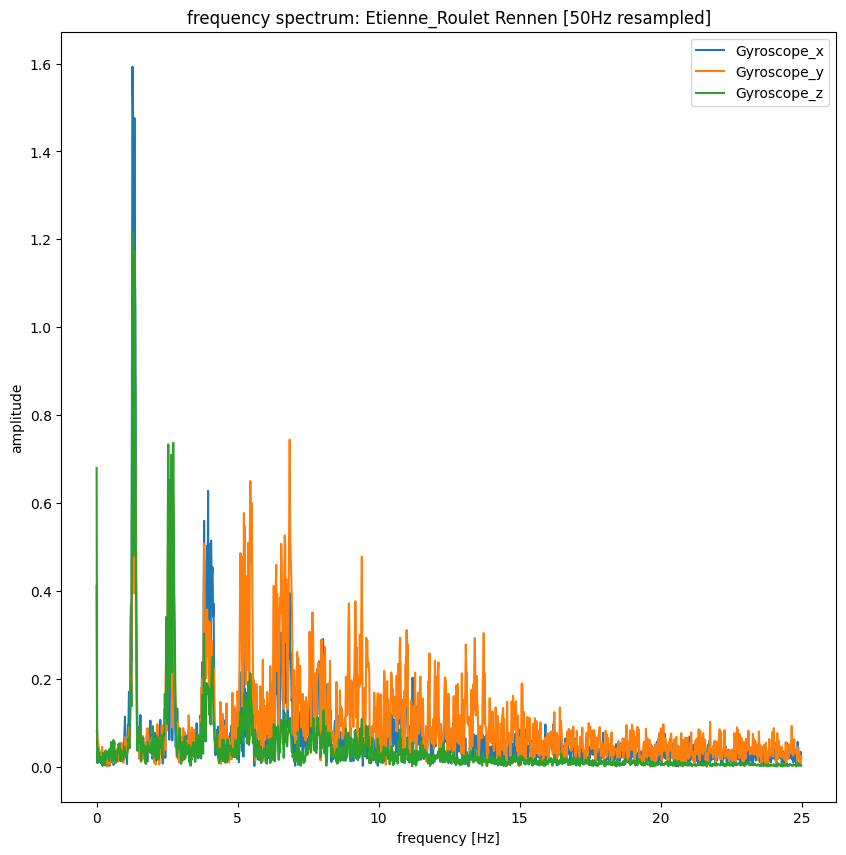

In [5]:
for filename, df in get_df_activity("Rennen").groupby(["filename"]):
    plot_trunc_res_gyro(df)

    break